## import libraries 

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

## import data

In [51]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [52]:
data = raw_data.copy()

## data preprocessing

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [54]:
string_col = data.select_dtypes('object').columns
data[string_col] = data[string_col].astype('string')

In [55]:
data.dtypes

Brand            string
Price           float64
Body             string
Mileage           int64
EngineV         float64
Engine Type      string
Registration     string
Year              int64
Model            string
dtype: object

In [56]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [57]:
data = data.dropna()

In [58]:
data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [59]:
data.shape

(4025, 9)

In [60]:
data.duplicated().sum()

50

In [61]:
data[data.duplicated()]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
348,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,yes,2016,GLS 63
602,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,yes,2016,GLS 63
1160,BMW,47000.0,other,5,2.00,Petrol,yes,2014,Z4
1573,Volkswagen,24900.0,sedan,1,1.60,Diesel,yes,2016,Jetta
1929,BMW,75555.0,sedan,30,4.40,Petrol,yes,2014,550
1943,Mercedes-Benz,20400.0,sedan,190,1.80,Gas,yes,2011,E-Class
2008,Mercedes-Benz,47600.0,van,0,2.20,Diesel,yes,2016,Vito
2037,Mitsubishi,15900.0,crossover,180,3.00,Gas,yes,2008,Pajero Wagon
2044,Mercedes-Benz,47600.0,van,0,2.20,Diesel,yes,2016,Vito
2380,Audi,39999.0,crossover,45,2.00,Diesel,yes,2014,Q5


In [62]:
data.drop_duplicates(inplace = True)

In [63]:
data[data.duplicated()]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model


In [64]:
data.shape

(3975, 9)

In [65]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Brand,3975,7,Volkswagen,871,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,3975.0,NaN,NaN,NaN,19056.936091,24976.141632,600.0,6950.0,11400.0,21317.5,300000.0
Body,3975,6,sedan,1518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,3975.0,NaN,NaN,NaN,164.820126,103.117252,0.0,92.0,159.0,230.0,980.0
EngineV,3975.0,NaN,NaN,NaN,2.763643,4.965189,0.6,1.8,2.2,3.0,99.99
Engine Type,3975,4,Diesel,1832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Registration,3975,2,yes,3604,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,3975.0,NaN,NaN,NaN,2006.290063,6.683223,1969.0,2002.0,2007.0,2011.0,2016.0
Model,3975,306,E-Class,181,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
data = data.drop('Model',axis = 1)
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


## univariate analysis

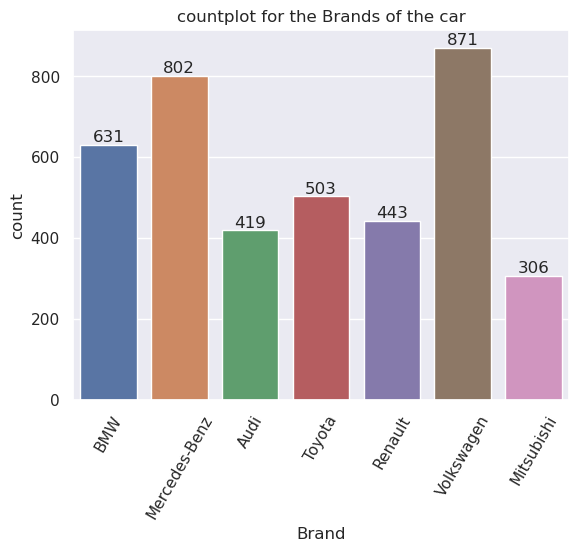

In [67]:
ax = sns.countplot(x='Brand', data=data)
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation = 60)
plt.title('countplot for the Brands of the car')
plt.show()

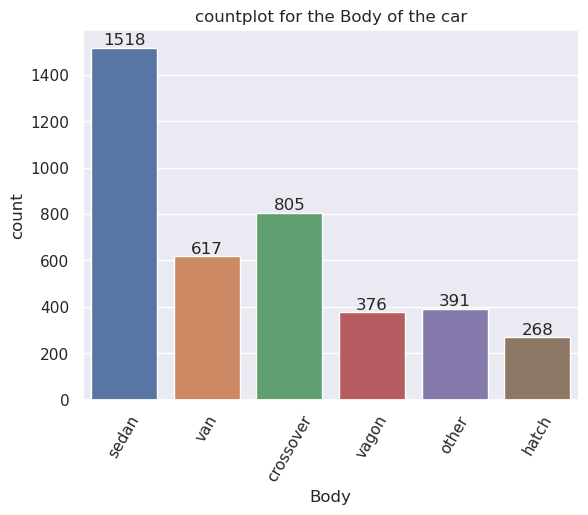

In [68]:
ax = sns.countplot(x='Body', data=data)
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation = 60)
plt.title('countplot for the Body of the car')
plt.show()

In [69]:
data['Engine Type'].value_counts()

Diesel    1832
Petrol    1455
Gas        582
Other      106
Name: Engine Type, dtype: Int64

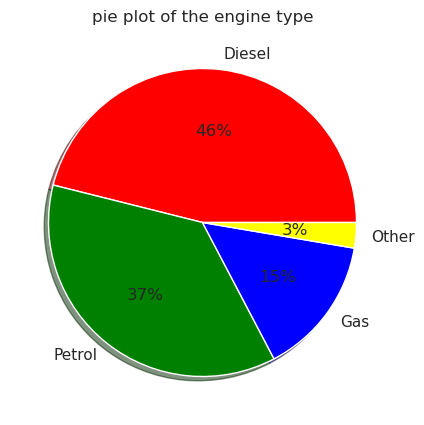

In [70]:
x = data['Engine Type'].value_counts()
y = x.index
plt.figure(figsize=(10,5))
plt.pie(x=x, labels=y,autopct='%.0f%%',shadow=True,colors=['red','green','blue','yellow'])
plt.title('pie plot of the engine type')
plt.show()

In [71]:
data['Registration'].value_counts()

yes    3604
no      371
Name: Registration, dtype: Int64

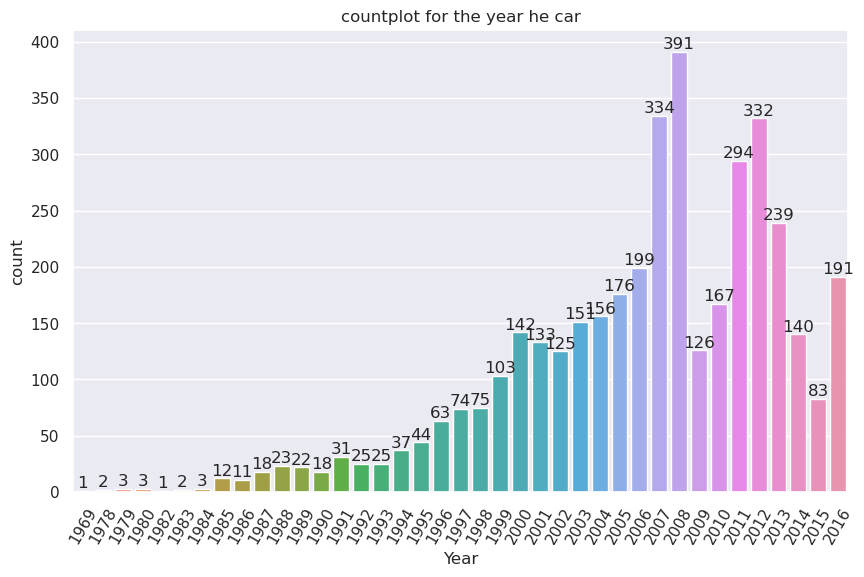

In [72]:
plt.figure(figsize=(10,6))

ax = sns.countplot(x='Year', data=data)
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation = 60)
plt.title('countplot for the year he car')
plt.show()

## check  outliers 

<AxesSubplot:xlabel='Price'>

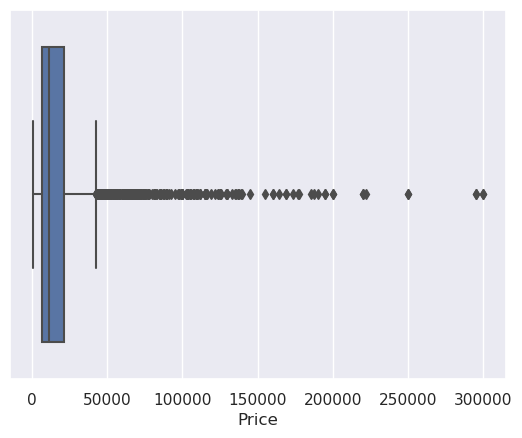

In [74]:
sns.boxplot(data['Price'])

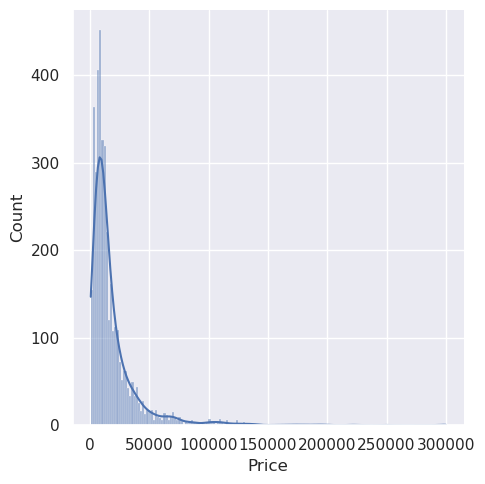

In [75]:
sns.displot(data['Price'],kind='hist',kde=True)

In [76]:
data_1 = data.copy()
x = data_1[data_1['Price']>45000].index.to_list()
data1 = data_1.drop(index=x,inplace=True)

In [77]:
data_1[data_1['Price']>45000]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year


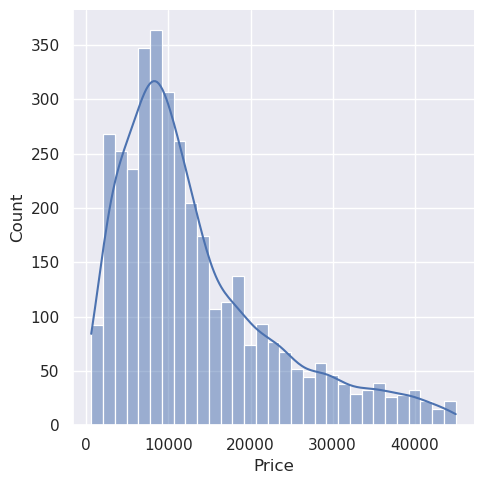

In [80]:
sns.displot(data_1['Price'],kind='hist',kde=True)

<AxesSubplot:xlabel='Mileage'>

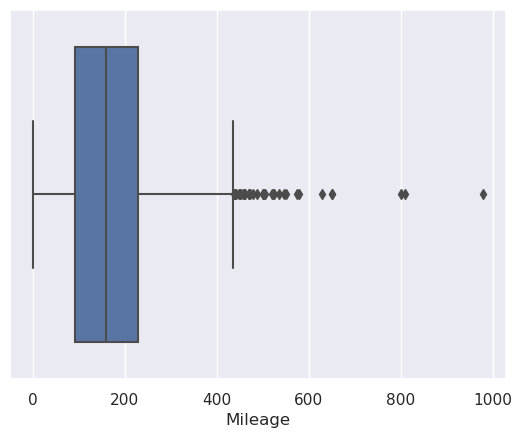

In [81]:
sns.boxplot(data['Mileage'])

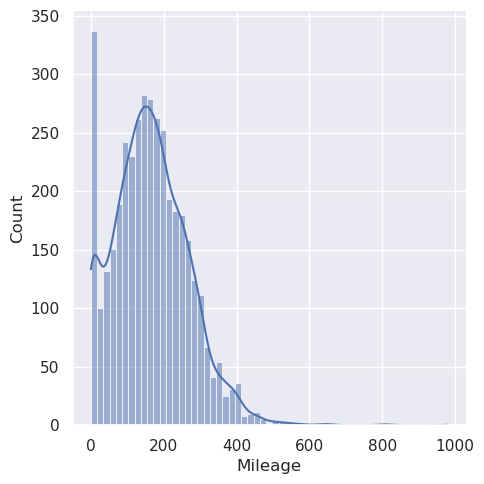

In [82]:
sns.displot(data['Mileage'],kind='hist',kde=True)

In [85]:
x = data_1[data_1['Mileage']>430].index.to_list()
data1 = data_1.drop(index=x,inplace=True)

In [86]:
data_1[data_1['Mileage']>430]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year


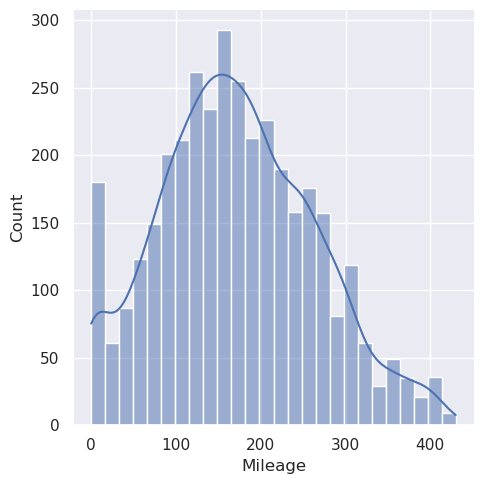

In [87]:
sns.displot(data_1['Mileage'],kind='hist',kde=True)

<AxesSubplot:xlabel='EngineV'>

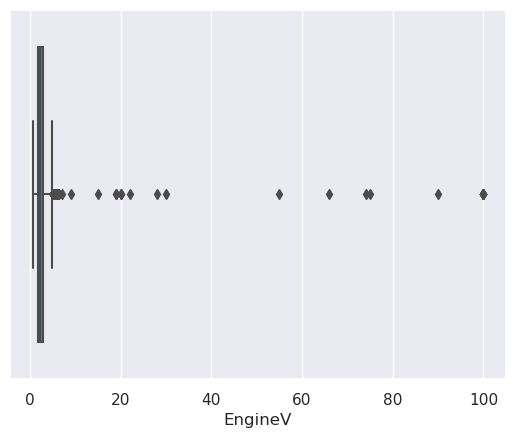

In [88]:
sns.boxplot(data['EngineV'])

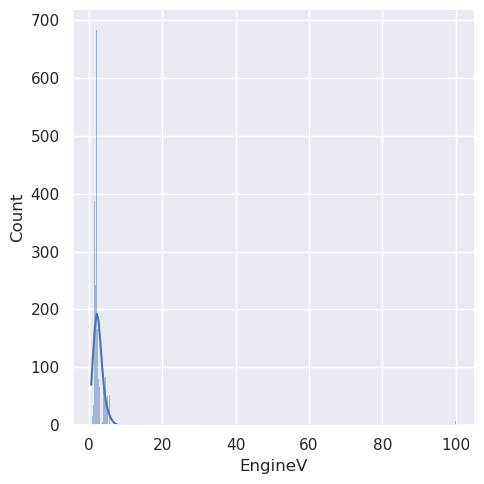

In [89]:
sns.displot(data['EngineV'],kind='hist',kde=True)

In [90]:
x = data_1[data_1['EngineV']>6.5].index.to_list()
data1 = data_1.drop(index=x,inplace=True)

In [92]:
data_1[data_1['EngineV']>6.5]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year


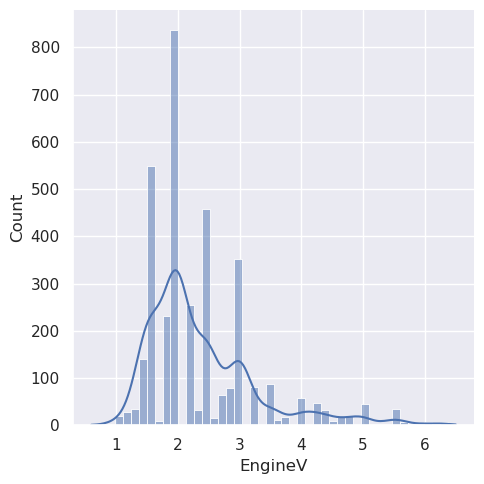

In [93]:
sns.displot(data_1['EngineV'],kind='hist',kde=True)

<AxesSubplot:xlabel='Year'>

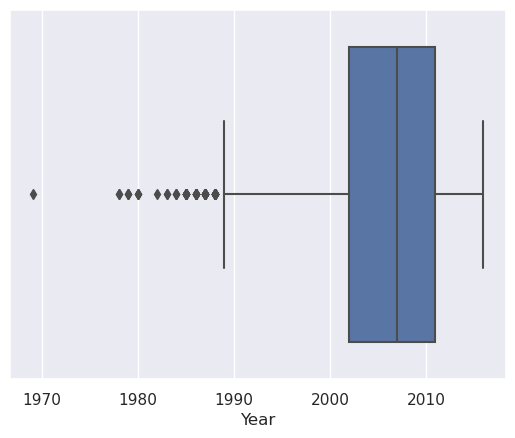

In [94]:
sns.boxplot(data['Year'])

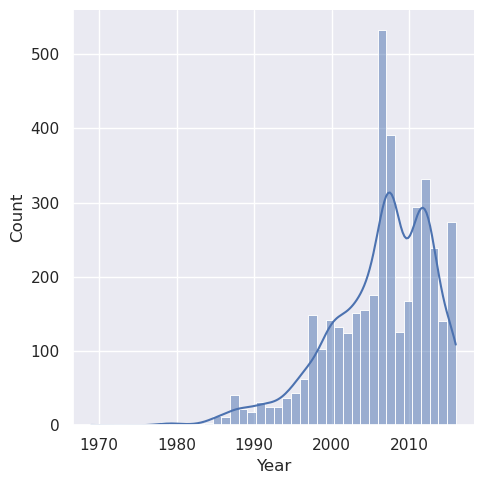

In [96]:
sns.displot(data['Year'],kind='hist',kde=True)

In [97]:
x = data_1[data_1['Year']<1985].index.to_list()
data1 = data_1.drop(index=x,inplace=True)

In [99]:
data_1[data_1['Year']<1985]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year


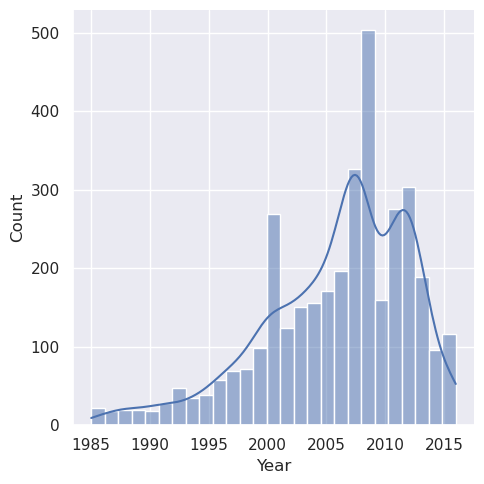

In [100]:
sns.displot(data_1['Year'],kind='hist',kde=True)

## bivariate analysis 

<AxesSubplot:xlabel='Brand', ylabel='Price'>

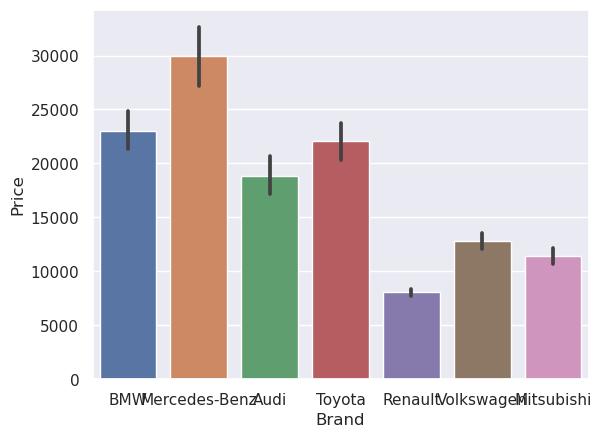

In [101]:
sns.barplot(x='Brand',y='Price',data=data)

<AxesSubplot:xlabel='Engine Type', ylabel='Price'>

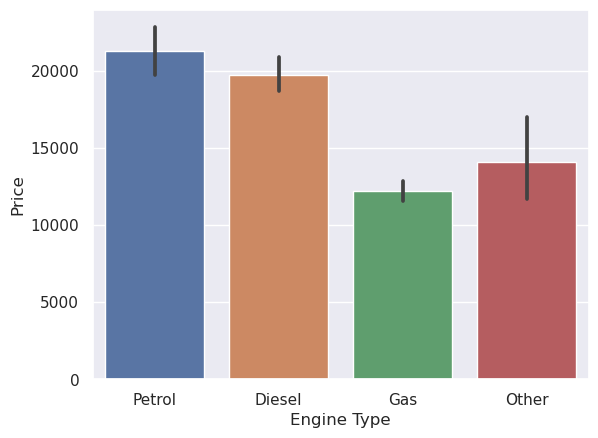

In [102]:
sns.barplot(x='Engine Type',y='Price',data=data)

In [107]:
data_1.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [108]:
data_1.shape

(3580, 8)

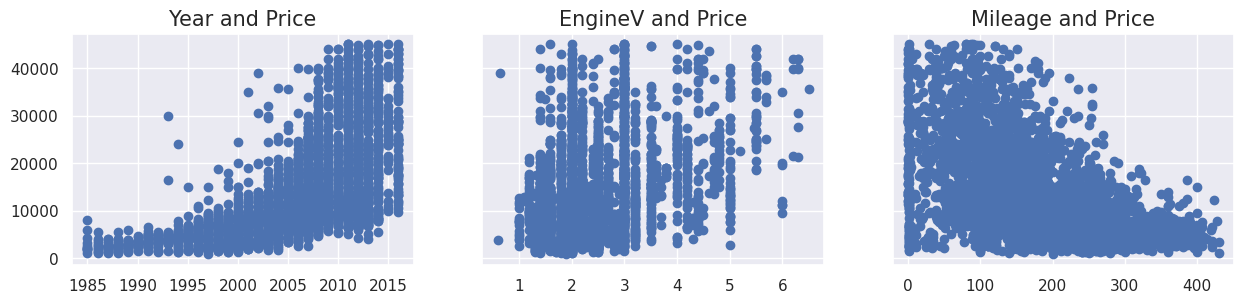

In [106]:
f , (ax1,ax2,ax3) = plt.subplots(1 , 3 , sharey = True , figsize = (15,3))
ax1.scatter(data_1['Year'],data_1['Price'])
ax1.set_title('Year and Price',fontsize = 15)
ax2.scatter(data_1['EngineV'],data_1['Price'])
ax2.set_title('EngineV and Price',fontsize = 15)
ax3.scatter(data_1['Mileage'],data_1['Price'])
ax3.set_title('Mileage and Price',fontsize = 15)
plt.show()

In [109]:
data_1['new_price'] = np.log(data_1['Price'])
data_1.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,new_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


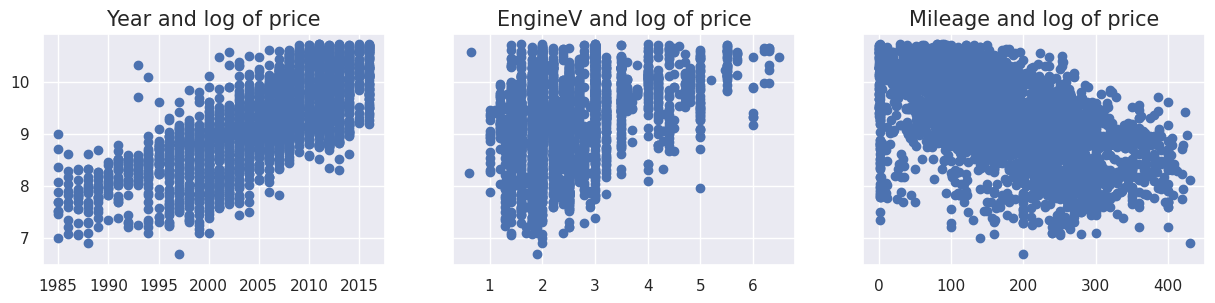

In [110]:
f , (ax1,ax2,ax3) = plt.subplots(1 , 3 , sharey = True , figsize = (15,3))
ax1.scatter(data_1['Year'],data_1['new_price'])
ax1.set_title('Year and log of price',fontsize = 15)
ax2.scatter(data_1['EngineV'],data_1['new_price'])
ax2.set_title('EngineV and log of price',fontsize = 15)
ax3.scatter(data_1['Mileage'],data_1['new_price'])
ax3.set_title('Mileage and log of price',fontsize = 15)
plt.show()

In [156]:
new_data = data_1.drop('Price',axis = 1)
new_data = new_data.reset_index(drop=True)
new_data.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,new_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656


In [157]:
string_col

['Brand', 'Body', 'Engine Type']

## encoding categorical data

In [158]:
new_data = pd.get_dummies(new_data, columns=string_col, drop_first=False)
new_data

,Mileage,EngineV,Registration,Year,new_price,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,...,Body_crossover,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,277,2.0,yes,1991,8.342840,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,427,2.9,yes,1999,8.974618,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
2,358,5.0,yes,2003,9.495519,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,240,4.2,yes,2007,10.043249,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,120,2.0,yes,2011,9.814656,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,163,2.5,yes,2008,9.350102,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3576,35,1.6,yes,2014,9.792556,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3577,1,3.5,yes,1999,8.779557,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3578,194,2.0,yes,1985,8.987197,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [159]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_data['Registration'] = le.fit_transform(new_data['Registration'])

In [160]:
new_data['Registration'].value_counts()

1    3219
0     361
Name: Registration, dtype: int64

In [161]:
new_data.head()

,Mileage,EngineV,Registration,Year,new_price,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,...,Body_crossover,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,277,2.0,1,1991,8.342840,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,427,2.9,1,1999,8.974618,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
2,358,5.0,1,2003,9.495519,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,240,4.2,1,2007,10.043249,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,120,2.0,1,2011,9.814656,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [162]:
inputs = new_data.drop(['new_price'],axis=1)
targets = new_data['new_price']

In [163]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=0)

In [164]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
x_train[['Mileage', 'EngineV', 'Year']] = ms.fit_transform(x_train[['Mileage', 'EngineV', 'Year']])
x_test[['Mileage', 'EngineV', 'Year']] = ms.transform(x_test[['Mileage', 'EngineV', 'Year']])


## machine learning model

In [165]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [166]:
y_pred = model.predict(x_test)

In [167]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.87237631988408

In [168]:
predictions = pd.DataFrame()
y_test = y_test.reset_index(drop=True)
predictions['actual_data'] = np.exp(y_test)
predictions['predictios'] = np.exp(y_pred)

In [169]:
predictions

,actual_data,predictios
0,4000.0,2630.686190
1,13499.0,16005.121800
2,6200.0,8258.869302
3,14500.0,9858.062447
4,29000.0,26888.740001
...,...,...
711,8500.0,9340.264443
712,2900.0,4960.577001
713,3300.0,3167.021626
714,8900.0,8138.771541


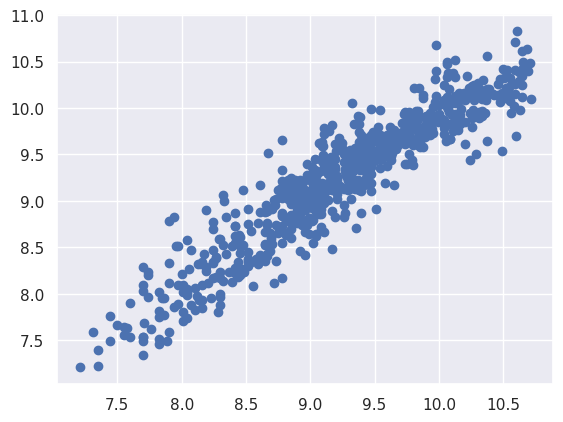

In [170]:
plt.scatter(y_test,y_pred)
plt.show()

In [171]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('Rmse : ',rmse)

Rmse :  0.2655287533359956


In [173]:
from sklearn.svm import SVR
model_2 = SVR(kernel='rbf')
model_2.fit(x_train, y_train)

SVR()

In [174]:
y_pred = model_2.predict(x_test)

In [175]:
r2_score(y_test, y_pred)

0.8987067877795687

In [176]:
from sklearn.tree import DecisionTreeRegressor
model_3 = DecisionTreeRegressor(random_state=0)
model_3.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [177]:
y_pred = model_3.predict(x_test)

In [178]:
r2_score(y_test, y_pred)

0.8216036585719567

In [182]:
from sklearn.ensemble import RandomForestRegressor
model_4 = RandomForestRegressor(n_estimators=100, random_state=0)
model_4.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [183]:
y_pred = model_4.predict(x_test)

In [184]:
r2_score(y_test, y_pred)

0.9005024977304074

In [186]:
prediction = pd.DataFrame()
prediction['actual_data'] = np.exp(y_test)
prediction['prediction'] = np.exp(y_pred)
prediction

,actual_data,prediction
0,4000.0,4598.428025
1,13499.0,16654.385360
2,6200.0,7225.413194
3,14500.0,8559.175397
4,29000.0,27198.243647
...,...,...
711,8500.0,9124.372373
712,2900.0,5164.632928
713,3300.0,2706.012818
714,8900.0,10928.547796


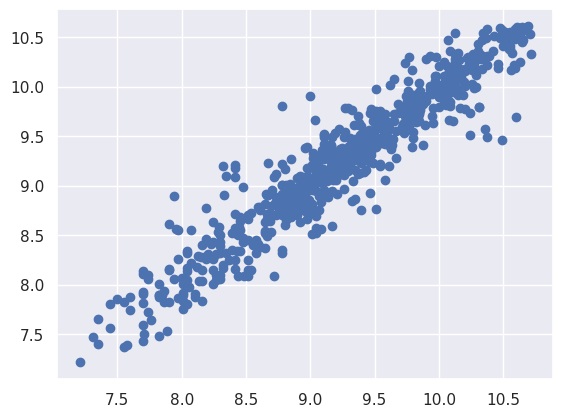

In [187]:
plt.scatter(y_test,y_pred)
plt.show()

- ### conclusion

**after implementing and evaluating various machine learning models including Linear Regression, Support Vector Regression (SVR), Decision Tree, and Random Forest, it was found that the Random Forest model outperformed the others with an impressive accuracy of 90%.**

- thank you